In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
df.shape

(571, 43)

In [4]:
df.columns.values

array(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107',
       'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331',
       'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442',
       'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype=object)

In [5]:
# format is AB-XXX
df.columns=df.columns.str.replace('HS-105/12','HS-105')
df.columns=df.columns.str.replace('HS-205/20','HS-205')
df.columns.values

array(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107',
       'HS-205', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331',
       'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442',
       'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype=object)

In [6]:
df=df.drop("Seat No.", axis=1)
df.shape

(571, 42)

In [7]:
df.isnull().sum()

PH-121     0
HS-101     0
CY-105     1
HS-105     1
MT-111     2
CS-105     0
CS-106     2
EL-102     2
EE-119     2
ME-107     2
CS-107     2
HS-205     5
MT-222     5
EE-222     7
MT-224     7
CS-210     7
CS-211     5
CS-203     5
CS-214     6
EE-217     6
CS-212     6
CS-215     6
MT-331     9
EF-303    10
HS-304    10
CS-301    10
CS-302    10
TC-383    10
MT-442    10
EL-332     9
CS-318     9
CS-306     9
CS-312    10
CS-317    12
CS-403    12
CS-421    12
CS-406    85
CS-414    13
CS-419    13
CS-423    14
CS-412    79
CGPA       0
dtype: int64

In [8]:
for i in df.columns:
    df.fillna(df[i].mode()[0], inplace= True)
    
df.isnull().sum().sum()

0

In [9]:
df[df.duplicated()]

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA


NO duplicates

In [10]:
elem=[]
for i in df:
    if (i== "CGPA"):
        break
    #print("\nColumn- ",i)
    elem.append(df[i].unique())
    
element= list(x for i in elem for x in i)
element= list(set(element))
element

['I',
 'A+',
 'A-',
 'F',
 'A',
 'D',
 'C-',
 'WU',
 'B',
 'D+',
 'C',
 'W',
 'B-',
 'B+',
 'C+']

We can observe some unusual grades as W and WU. we need to treat them.

In [11]:
#get index and count ot unusual grades
ind=[]
for i in df:
    ind.append(df.index[df[i]=="W"].tolist())
    ind.append(df.index[df[i]=="WU"].tolist())
    
#index= (set(ind)).tolist()
inde=list(x for i in ind for x in i)
inde= list(set(inde))
print(inde)
print("Count-",len(inde))

[137, 521, 142, 143, 281, 543, 288, 293, 423, 424, 44, 432, 60, 447, 453, 454, 340, 468, 91, 352, 481, 489, 492, 511]
Count- 24


These are less in number so we can drop it with no worries.

In [12]:
df=df.drop(inde)
df=df.reset_index(drop=True)
df

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
543,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
544,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
545,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [13]:
print(df[df.isin(['W','WU'])].empty )

False


unwanted grades have been removed

In [14]:
elem=[]
for i in df:
    if (i== "CGPA"):
        break
    #print("\nColumn- ",i)
    elem.append(df[i].unique())
    
element= list(x for i in elem for x in i)
element= list(set(element))
element

['A+', 'A-', 'F', 'A', 'D', 'C-', 'B', 'D+', 'C', 'B-', 'B+', 'C+']

Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le= LabelEncoder()
for i in df.drop("CGPA", axis=1):
    df[i]= le.fit_transform(df[i])

In [17]:
elem=[]
for i in df:
    if (i== "CGPA"):
        break
    #print("\nColumn- ",i)
    elem.append(df[i].unique())
    
element= list(x for i in elem for x in i)
element= list(set(element))
element

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [18]:
#let's check again for any inconsistent data using .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  547 non-null    int32  
 1   HS-101  547 non-null    int32  
 2   CY-105  547 non-null    int32  
 3   HS-105  547 non-null    int32  
 4   MT-111  547 non-null    int32  
 5   CS-105  547 non-null    int32  
 6   CS-106  547 non-null    int32  
 7   EL-102  547 non-null    int32  
 8   EE-119  547 non-null    int32  
 9   ME-107  547 non-null    int32  
 10  CS-107  547 non-null    int32  
 11  HS-205  547 non-null    int32  
 12  MT-222  547 non-null    int32  
 13  EE-222  547 non-null    int32  
 14  MT-224  547 non-null    int32  
 15  CS-210  547 non-null    int32  
 16  CS-211  547 non-null    int32  
 17  CS-203  547 non-null    int32  
 18  CS-214  547 non-null    int32  
 19  EE-217  547 non-null    int32  
 20  CS-212  547 non-null    int32  
 21  CS-215  547 non-null    int32  
 22  MT

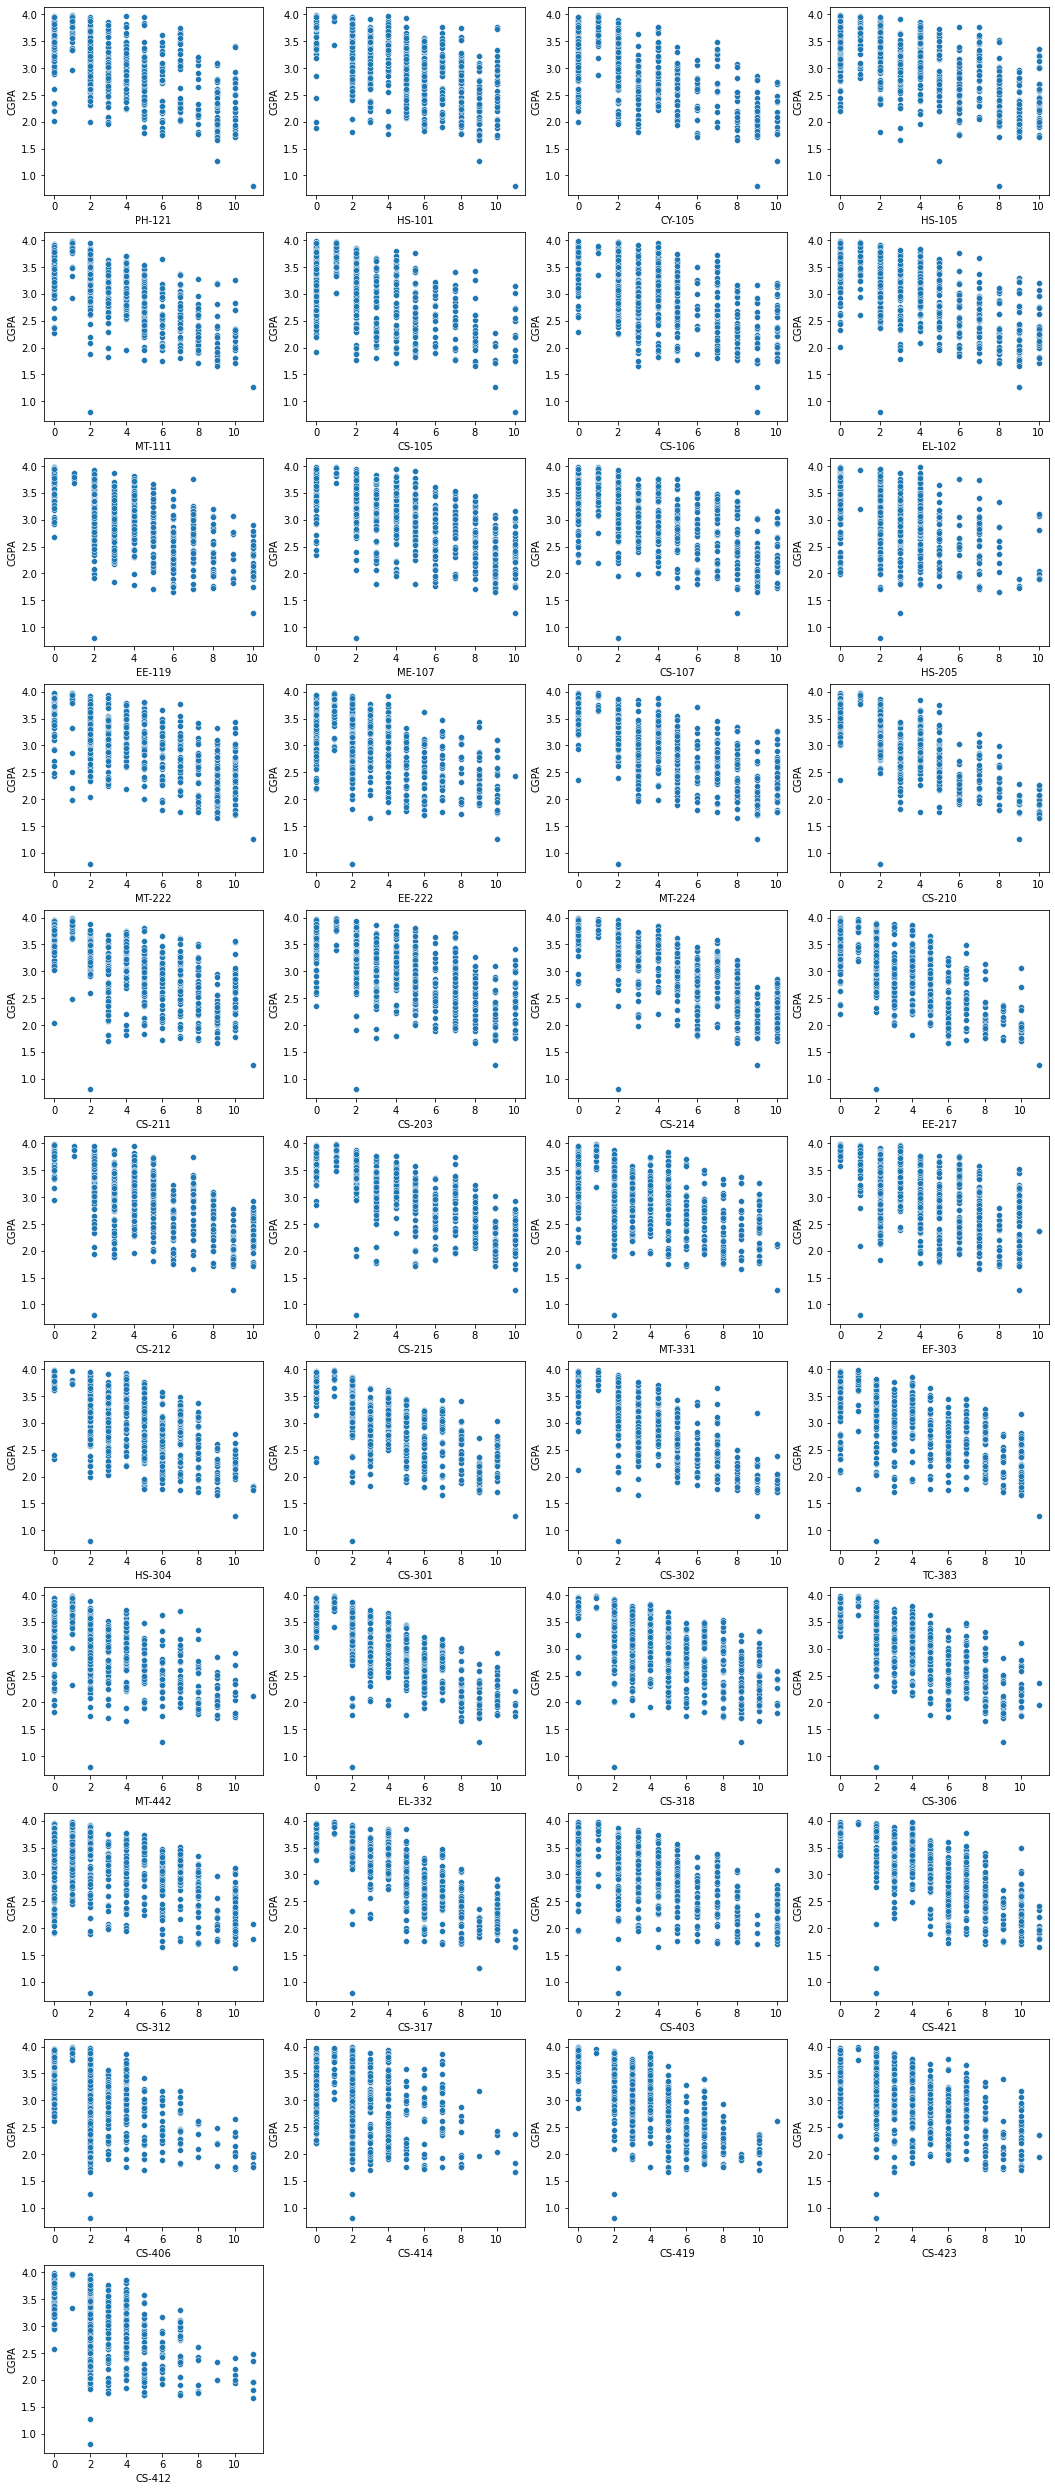

In [19]:
plt.figure(figsize=(18,45))
c=1
for i in df.drop("CGPA", axis=1):
    plt.subplot(11,4,c)
    sns.scatterplot(x=i, y="CGPA",data=df)
    c+=1

<AxesSubplot:>

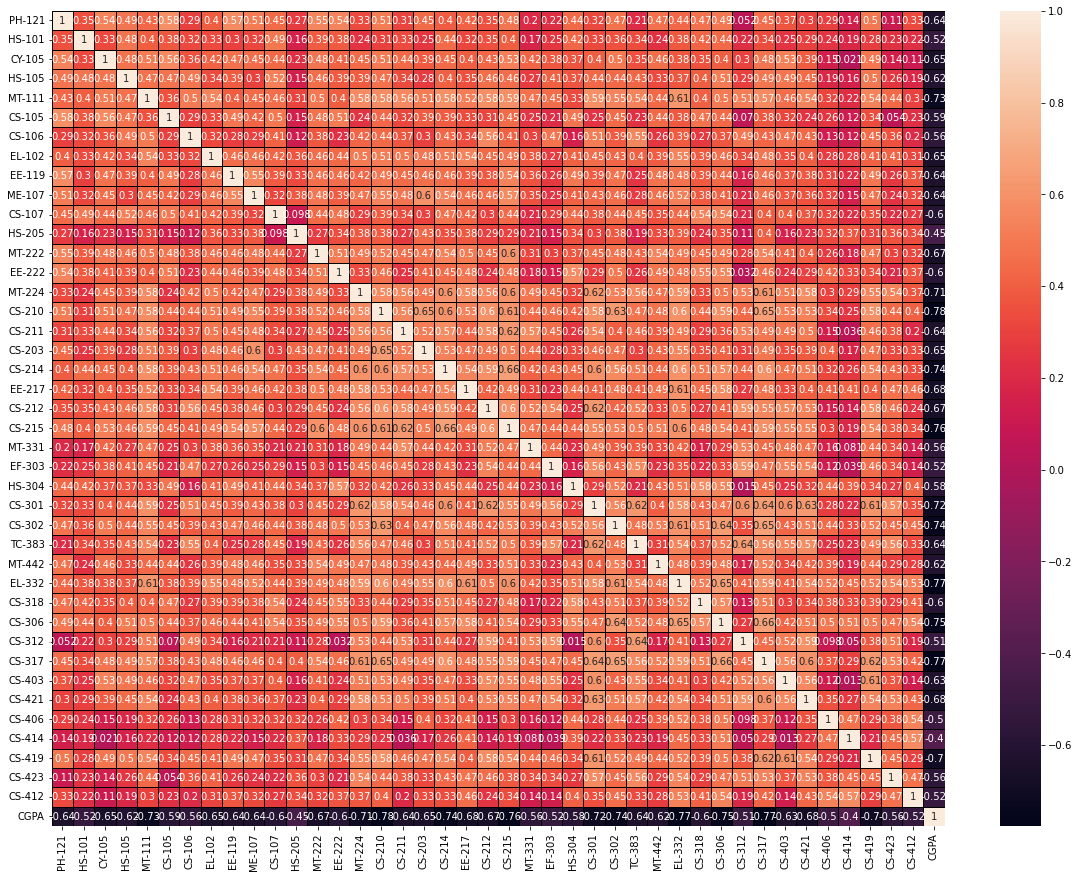

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor="Black")

In [21]:
for i in df:
    print(i,end="    ")
    print(df['CGPA'].corr(df[i]),end="\n\n" )

PH-121    -0.6362336557995895

HS-101    -0.5219318637932144

CY-105    -0.6540526262979085

HS-105    -0.6174514738959523

MT-111    -0.7279100905399725

CS-105    -0.5853590040018495

CS-106    -0.5597054057616602

EL-102    -0.6498711051440904

EE-119    -0.6351256184108122

ME-107    -0.6432071959451441

CS-107    -0.5977808826254905

HS-205    -0.44954274008502465

MT-222    -0.6674942293814622

EE-222    -0.6010771899163898

MT-224    -0.7117306765604761

CS-210    -0.777184572278099

CS-211    -0.6392264502059977

CS-203    -0.6460643878994138

CS-214    -0.7428334101146679

EE-217    -0.6806859698745874

CS-212    -0.6698499570012214

CS-215    -0.7578218780570062

MT-331    -0.5576978564631255

EF-303    -0.5225146245700545

HS-304    -0.5831883875353537

CS-301    -0.7201068953861002

CS-302    -0.7444510568215892

TC-383    -0.639104022329018

MT-442    -0.6241412074463139

EL-332    -0.772505300780874

CS-318    -0.6049550273492523

CS-306    -0.7504555021390411

CS-312    

All features are correlated with the CGPA

In [22]:
x= df.drop("CGPA",axis=1)
y= df["CGPA"]

x.shape, y.shape

((547, 41), (547,))

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score

In [37]:
#finding random_state

models=[LinearRegression(),DecisionTreeRegressor(), SVR(), RandomForestRegressor(n_estimators=200),
       KNeighborsRegressor(n_neighbors=5)]

for m in models:
    mdl= m
    acc=0
    rs=0
    print("\nStarting with",m)
    for i in range(201):
        x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=i)
        
        mdl.fit(x_train,y_train)
        Y= mdl.predict(x_test)
        accuracy=r2_score(y_test,Y)
        
        if accuracy>acc:
            acc=accuracy
            rs=i
            print("Accuracy now is {0}, at random state {1}".format(acc,rs))


Starting with LinearRegression()
Accuracy now is 0.9780364275540046, at random state 0
Accuracy now is 0.982517885239533, at random state 1
Accuracy now is 0.9863095591329012, at random state 6
Accuracy now is 0.9880720603706925, at random state 64

Starting with DecisionTreeRegressor()
Accuracy now is 0.789644800688125, at random state 0
Accuracy now is 0.8413682912242045, at random state 1
Accuracy now is 0.854014418210912, at random state 8
Accuracy now is 0.8726954484785736, at random state 30
Accuracy now is 0.8751754964207393, at random state 76

Starting with SVR()
Accuracy now is 0.9753561545041683, at random state 0
Accuracy now is 0.9776012708853558, at random state 1
Accuracy now is 0.9779350595350703, at random state 10
Accuracy now is 0.9786673614564734, at random state 28
Accuracy now is 0.9790119667971039, at random state 68
Accuracy now is 0.9804287458128988, at random state 75
Accuracy now is 0.9809849492226563, at random state 172
Accuracy now is 0.9812641677952334, 

#### Linear Regression

In [39]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=64)
lr= LinearRegression()

lr.fit(x_train, y_train)

print("Coefficients are",lr.coef_)
print("\nIntercept is",lr.intercept_)
print("\nTraining data accuracy is",r2_score(y_train,lr.predict(x_train)))

y_predlr=lr.predict(x_test)

acc_lr= r2_score(y_test, y_predlr)
print("\nTesting data accuracy is",acc_lr)

Coefficients are [-0.01818655 -0.01367234 -0.01903843 -0.00884023 -0.00140907 -0.01694107
 -0.01049124 -0.00766573 -0.00320515 -0.00681164 -0.00316777 -0.00750545
 -0.00030925 -0.00302449 -0.0045821  -0.01394028 -0.00517421 -0.00390005
 -0.00656292 -0.01139077  0.00029303 -0.00840335 -0.01262116  0.00220314
 -0.00353025 -0.01421839 -0.00955706 -0.00664268 -0.00819061 -0.00933526
  0.0002409  -0.00815263 -0.00800896 -0.00937532 -0.01028158 -0.00464634
 -0.01368197 -0.01699589 -0.00162403 -0.00722523 -0.00921323]

Intercept is 4.190957114655316

Training data accuracy is 0.9516986658514053

Testing data accuracy is 0.9880720603706925


#### DecisionTreeRegressor

In [40]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=76)
dt= DecisionTreeRegressor()

dt.fit(x_train, y_train)

print("\nTraining data accuracy is",r2_score(y_train,dt.predict(x_train)))

y_preddt=dt.predict(x_test)

acc_df= r2_score(y_test, y_preddt)
print("\nTesting data accuracy is",acc_df)


Training data accuracy is 1.0

Testing data accuracy is 0.8895881870196874


#### SVR

In [41]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=190)
svr= SVR()

svr.fit(x_train, y_train)
print("\nTraining data accuracy is", r2_score(y_train, svr.predict(x_train)))

y_predsv= svr.predict(x_test)

acc_sv= r2_score(y_test, y_predsv)
print("\nTesting data accuracy is", r2_score(y_test, y_predsv))


Training data accuracy is 0.9680916829538838

Testing data accuracy is 0.9812641677952334


#### Random Forest

In [42]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=134)
rf= RandomForestRegressor(n_estimators=200)

rf.fit(x_train, y_train)
print("\nTraining data accuracy is", r2_score(y_train, rf.predict(x_train)))

y_predrf= rf.predict(x_test)

acc_rf= r2_score(y_test, y_predrf)
print("\nTesting data accuracy is", acc_rf)


Training data accuracy is 0.9885332097609163

Testing data accuracy is 0.9672438680586634


#### KNN

In [43]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=29)
kn= KNeighborsRegressor(n_neighbors=5)

kn.fit(x_train, y_train)
print("\nTraining data accuracy is", r2_score(y_train, kn.predict(x_train)))

y_predkn= kn.predict(x_test)

acc_kn= r2_score(y_test, y_predkn)
print("\nTesting data accuracy is", acc_kn)


Training data accuracy is 0.9439191134748919

Testing data accuracy is 0.9759439861573331


Here, we can see that LinearRegression is giving 98.8% accuracy which is more than enough.

#### Saving Model

In [44]:
import pickle

In [45]:
#saving model
pickle.dump(lr, open('CGPA.pkl', 'wb'))

In [46]:
#Load model
model= pickle.load(open('CGPA.pkl', 'rb'))

In [47]:
#prediction
model.predict(x_test)

array([2.25250904, 3.81424045, 2.92701931, 3.36175018, 1.68817696,
       2.44126666, 2.82384412, 2.97515415, 2.57205296, 2.08596765,
       2.60486778, 3.85077592, 2.99303902, 2.86430552, 3.80580804,
       3.87057781, 1.79800602, 2.5044959 , 3.84281165, 3.33604031,
       1.61141488, 3.75221922, 3.63138832, 2.08471665, 3.44209822,
       3.75542718, 2.64990244, 2.86881661, 2.93834659, 3.10921565,
       2.1275827 , 2.55516014, 3.4426687 , 2.62101928, 3.6357708 ,
       3.54122886, 3.4049789 , 3.53776692, 3.79634115, 3.33596635,
       3.073991  , 2.67071906, 2.46631003, 1.72072208, 3.59779149,
       3.20437985, 2.81639164, 3.15531816, 2.30130156, 3.21249674,
       1.98863246, 3.1120299 , 3.5800033 , 2.2821746 , 3.61569924,
       3.29126295, 3.74397963, 1.75417125, 3.6192915 , 2.49945314,
       3.45382208, 2.71939823, 2.36757278, 3.79530286, 3.45637831,
       3.98760672, 2.17281524, 3.04675227, 2.90826446, 3.49371053,
       3.29865617, 2.51106847, 2.68125057, 2.20087945, 3.24565